KNN 


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import datasets

Diabetes prediction


In [2]:
# Load the diabetes dataset
diabetesX, diabetesY = datasets.load_diabetes(return_X_y=True)

#Split the dataset into training and testing sets 8:2
X_train, X_test, y_train, y_test = train_test_split(diabetesX, diabetesY, test_size=0.2, random_state=42)

In [3]:
#Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Testing
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

3047.449887640449

In [5]:
# Compare among k values
k_values = range(1, 31)
scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    scores.append(mse)

scores

[4939.168539325843,
 3659.058988764045,
 3287.027465667915,
 3266.454353932584,
 3047.449887640449,
 2891.338951310861,
 2969.523733088741,
 2960.7099719101125,
 3070.9680954362607,
 3168.353370786517,
 3098.69514346736,
 3072.6072877652937,
 3106.2421381557074,
 3098.91097225407,
 3053.773383270912,
 3064.1730600421347,
 2975.462968002799,
 3057.9618532390064,
 3010.3593326900927,
 3048.398146067416,
 3062.901373283396,
 3015.9257359086264,
 3042.6403219982585,
 3030.1116768102374,
 2991.518453932584,
 2994.5997274117412,
 2994.8108228911387,
 3032.1174472598027,
 3077.8517281460013,
 3111.057440699126]

Text(0.5, 1.0, 'KNN Regressor: K vs Mean Squared Error')

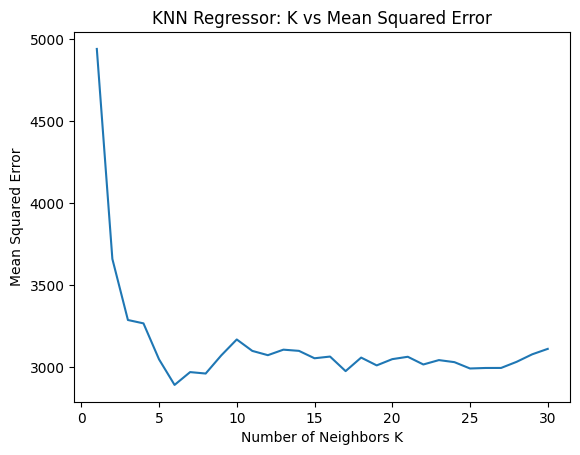

In [6]:
#Plot the k values against the scores
plt.plot(k_values, scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regressor: K vs Mean Squared Error')

In [7]:
# Train the KNN regressor with k=5

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


IRIS Classification

In [8]:
# Load dataset
iris_X, iris_Y = datasets.load_iris(return_X_y=True)


# Split the dataset into training and testing sets 8:2
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_Y, test_size=0.2, random_state=42)

In [9]:
#Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
#Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

Text(0.5, 1.0, 'KNN Classifier: K vs Accuracy')

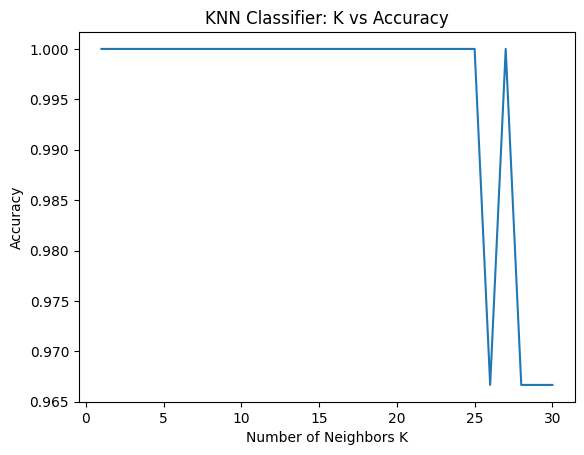

In [11]:
# Compare among k values
k_values = range(1, 31)
accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

plt.plot(k_values, accuracy)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier: K vs Accuracy')

In [12]:
# Train with k = 27
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

KNN for IMDB Classification


In [13]:
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report

c:\Users\hoang phuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# Load the datasets
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb["train"], imdb["test"]


len(imdb_train["text"]), len(imdb_test["text"])

(25000, 25000)

In [15]:
# Convert text to vector using Bag of worlds
vectorizer = CountVectorizer(max_features= 1000 )

X_train = vectorizer.fit_transform(imdb_train["text"]).toarray()
X_test = vectorizer.transform(imdb_test["text"]).toarray()

y_train = np.array(imdb_train["label"])
y_test = np.array(imdb_test["label"])

In [16]:
# Normalize the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Training
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)


(0.63428, 0.6636005739725523)

K Means

Cluster customer at a mall

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [19]:
!gdown 16w9m7CK-vsTZrvw3XMROdkWLiasOxw68

Downloading...
From: https://drive.google.com/uc?id=16w9m7CK-vsTZrvw3XMROdkWLiasOxw68
To: h:\Study\CS\AI-Data science\ML Study\KNN and K-Means Clusterig\Mall_Customers.csv

  0%|          | 0.00/4.29k [00:00<?, ?B/s]
100%|██████████| 4.29k/4.29k [00:00<00:00, 535kB/s]


In [20]:
df = pd.read_csv("Mall_Customers.csv")
df 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
df.drop("CustomerID", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


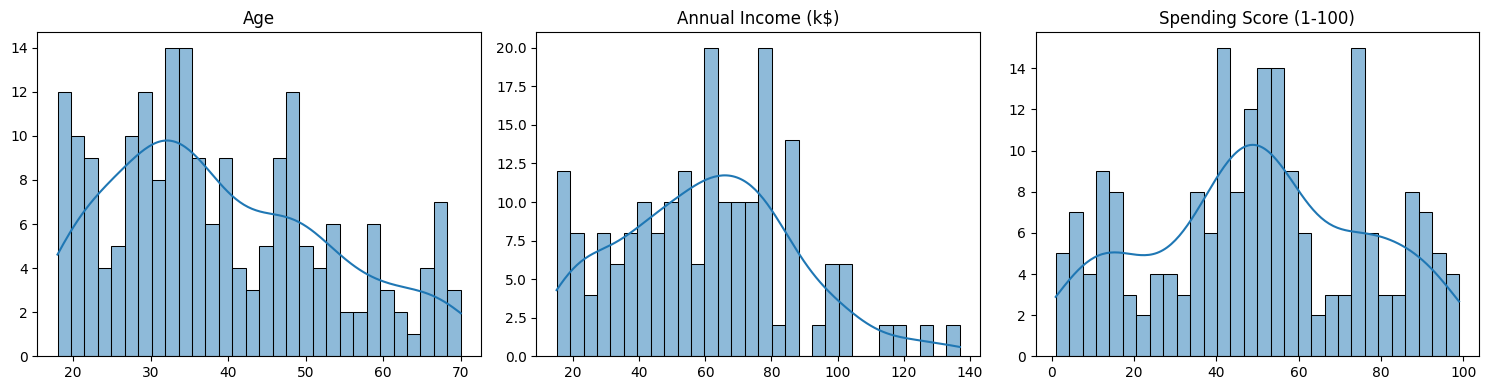

In [23]:
# Analysis
import math

def plot_all_histograms(df, title_prefix =""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()

plot_all_histograms(df)

In [24]:
#Normalize the data
label_encoder = LabelEncoder()

df['Genre'] = label_encoder.fit_transform(df['Genre'])

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

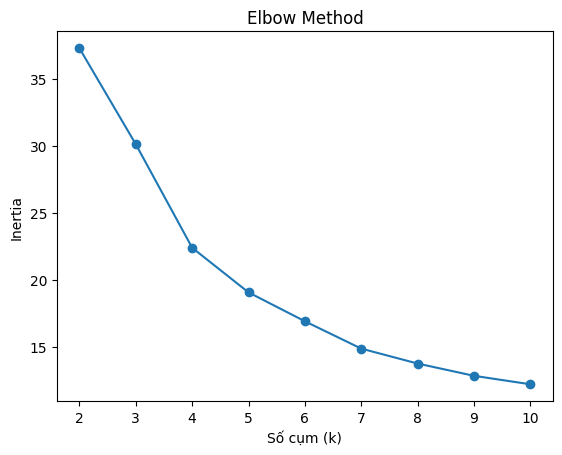

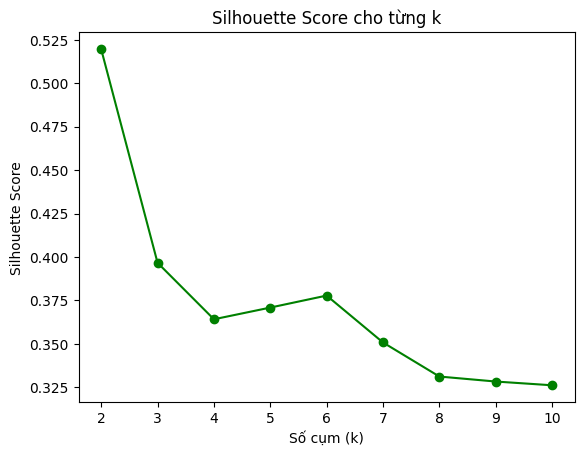

In [25]:
inertia = []
silhouette_scores = []

k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Vẽ Elbow Method
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Số cụm (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Vẽ Silhouette Score
plt.plot(k_values, silhouette_scores, marker="o", color="green")
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score cho từng k")
plt.show()

In [ ]:
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Số cluster tối ưu theo Silhouette Score: {optimal_k}")
print(f"Silhouette Score cao nhất: {max(silhouette_scores):.3f}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(df_scaled)

silhouette_score(df_scaled, kmeans.labels_)

Số cluster tối ưu theo Silhouette Score: 2
Silhouette Score cao nhất: 0.519


0.32619545933970323